In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
pd.options.display.max_rows = None
plt.rcParams['figure.figsize'] = [15,8]

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Kaggle/ML Dataset/10 ML datasets/CO2_emission.csv')
data.head()

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Model_Year                              935 non-null    int64  
 1   Make                                    935 non-null    object 
 2   Model                                   935 non-null    object 
 3   Vehicle_Class                           935 non-null    object 
 4   Engine_Size                             935 non-null    float64
 5   Cylinders                               935 non-null    int64  
 6   Transmission                            935 non-null    object 
 7   Fuel_Consumption_in_City(L/100 km)      935 non-null    float64
 8   Fuel_Consumption_in_City_Hwy(L/100 km)  935 non-null    float64
 9   Fuel_Consumption_comb(L/100km)          935 non-null    float64
 10  CO2_Emissions                           935 non-null    int64 

In [ ]:
data.describe()

,Model_Year,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
count,935.0,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,2021.0,3.214866,5.716578,12.498610,9.306203,11.060214,258.529412,4.726203
std,0.0,1.388513,1.977359,3.487271,2.215819,2.867028,64.442768,1.712127
min,2021.0,1.000000,3.000000,4.000000,3.900000,4.000000,94.000000,1.000000
25%,2021.0,2.000000,4.000000,10.100000,7.700000,9.100000,213.000000,3.000000
50%,2021.0,3.000000,6.000000,12.000000,9.000000,10.700000,255.000000,5.000000
75%,2021.0,4.000000,8.000000,14.800000,10.800000,13.100000,303.500000,6.000000
max,2021.0,8.000000,16.000000,30.300000,20.900000,26.100000,608.000000,7.000000


In [ ]:
data.Model_Year.value_counts()

2021    935
Name: Model_Year, dtype: int64

In [ ]:
corr = data.corr()

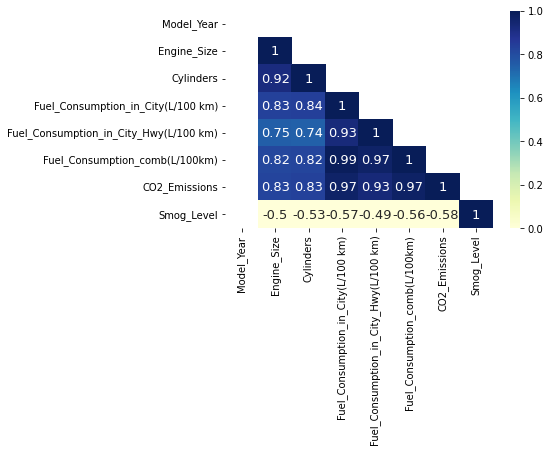

In [ ]:
import seaborn as sns
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,k=1)]= True
sns.heatmap(corr, cmap ='YlGnBu',annot=True,annot_kws={'size' : 13},vmax=1,vmin=0,mask =mask)

In [ ]:
data = data.drop(['Model_Year','Fuel_Consumption_comb(L/100km)'],axis=1)
data.columns

Index(['Make', 'Model', 'Vehicle_Class', 'Engine_Size', 'Cylinders',
       'Transmission', 'Fuel_Consumption_in_City(L/100 km)',
       'Fuel_Consumption_in_City_Hwy(L/100 km)', 'CO2_Emissions',
       'Smog_Level'],
      dtype='object')

In [ ]:
data.Cylinders.value_counts()

4     407
6     265
8     213
12     21
3      18
10      8
16      2
5       1
Name: Cylinders, dtype: int64

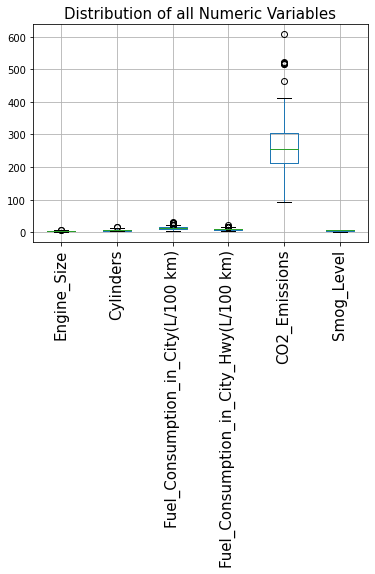

In [ ]:
data.boxplot()
plt.title('Distribution of all Numeric Variables', fontsize = 15)
plt.xticks(rotation = 90, fontsize = 15)
plt.show()

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Engine_Size                                2.0
Cylinders                                  4.0
Fuel_Consumption_in_City(L/100 km)         4.7
Fuel_Consumption_in_City_Hwy(L/100 km)     3.1
CO2_Emissions                             90.5
Smog_Level                                 3.0
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


(array([1, 2, 3, 4, 5, 6]), <a list of 6 Text major ticklabel objects>)

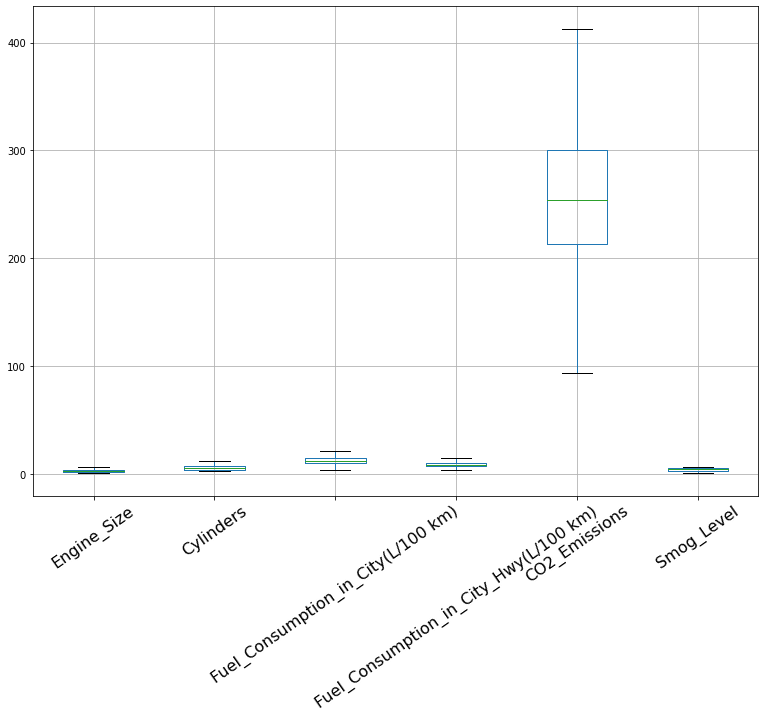

In [ ]:
data_1 = data[~((data < (Q1-1.5*IQR))| (data > (Q3+1.5*IQR))).any(axis =1)]
data_1 = data_1.reset_index(drop=True)
data_1.boxplot(figsize=(13,9))
plt.xticks(fontsize=16,rotation= 35)

In [ ]:
data_1.shape

(921, 10)

In [ ]:
missing_values=data.isnull().sum().sort_values(ascending = False)
missing_values

Make                                      0
Model                                     0
Vehicle_Class                             0
Engine_Size                               0
Cylinders                                 0
Transmission                              0
Fuel_Consumption_in_City(L/100 km)        0
Fuel_Consumption_in_City_Hwy(L/100 km)    0
CO2_Emissions                             0
Smog_Level                                0
dtype: int64

In [ ]:
X = data.drop('CO2_Emissions',axis =1)
y = data.CO2_Emissions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd767846e90>,
      dtype=object)

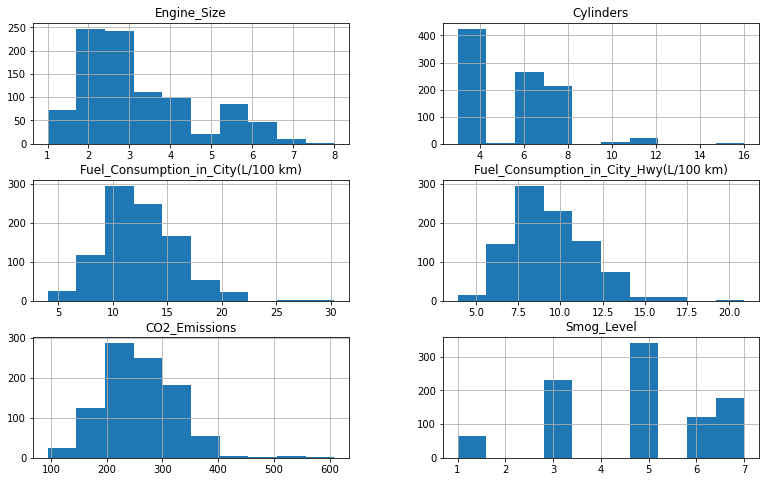

In [ ]:
data.hist(figsize=(13,8))

In [1]:
# categorical = data[data.columns[data.dtypes == 'object']]
# fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (30, 20))

# for variable, subplot in zip(categorical, ax.flatten()):
#     sns.boxplot(x = variable, y = 'CO2_Emissions', data = data, ax = subplot)

# plt.show()

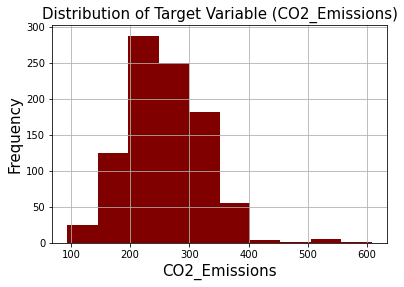

In [ ]:
data.CO2_Emissions.hist(color = 'maroon')
plt.title('Distribution of Target Variable (CO2_Emissions)', fontsize = 15)
plt.xlabel('CO2_Emissions', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.show()

                         
  Here is no missing Values.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state = 1)
print('Shape of x_train',x_train.shape)
print('shape of x_test',x_test.shape)
print('Shape of Y_train',Y_train.shape)
print('Shape of Y_test',Y_test.shape)

Shape of x_train (654, 9)
shape of x_test (281, 9)
Shape of Y_train (654,)
Shape of Y_test (281,)


In [ ]:
# X_test_1 = X_train.reset_index(drop=True)
# X_test_1.head()

In [ ]:
x_train=x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
print(type(x_train),type(x_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [ ]:
Y_train=Y_train.reset_index(drop=True)
Y_test=Y_test.reset_index(drop=True)
print(Y_train.head())
print(Y_test.head())

0    130
1    237
2    308
3    278
4    309
Name: CO2_Emissions, dtype: int64
0    279
1    269
2    205
3    205
4    281
Name: CO2_Emissions, dtype: int64


In [ ]:
x_num=x_train[x_train.columns[x_train.dtypes != 'object']]
print(x_num.shape)
print(type(x_num))

x_num_test=x_test[x_train.columns[x_train.dtypes != 'object']]
print(x_num_test.shape)
print(type(x_num_test))

(654, 5)
<class 'pandas.core.frame.DataFrame'>
(281, 5)
<class 'pandas.core.frame.DataFrame'>


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_num_tr = scaler.fit_transform(x_num)
x_num_te = scaler.transform(x_num_test)
x_num_tr = pd.DataFrame(x_num_tr)
x_num_te = pd.DataFrame(x_num_te)
print(x_num_tr.shape,type(x_num_tr))
print('\n',x_num_te.shape,type(x_num_te))

(654, 5) <class 'pandas.core.frame.DataFrame'>

 (281, 5) <class 'pandas.core.frame.DataFrame'>


In [ ]:
Y_train= Y_train.values.reshape(-1, 1)
Y_test = Y_test.values.reshape(-1, 1)
print(Y_train.shape)
print(Y_test.shape)

(654,)
(281,)


In [ ]:
Y_tr = scaler.fit_transform(Y_train)
Y_te = scaler.transform(Y_test)

In [ ]:
x_cat=x_train[x_train.columns[x_train.dtypes == 'object']]
print(x_cat.shape)
x_cat.head()

(654, 4)


,Make,Model,Vehicle_Class,Transmission
0,Lexus,UX 250h,Compact,AV6
1,Audi,S4 Sedan quattro,Compact,AS8
2,Ford,Bronco Sasquatch 4WD,SUV: Small,AS10
3,Porsche,911 Targa 4S,Minicompact,M7
4,Chevrolet,Tahoe,SUV: Standard,A10


In [ ]:
#test
x_cat_test=x_test[x_train.columns[x_train.dtypes == 'object']]
print(x_cat_test.shape)
x_cat_test.head()

(281, 4)


,Make,Model,Vehicle_Class,Transmission
0,Genesis,GV80 AWD,SUV: Standard,AS8
1,Audi,RS 5 Coupe quattro,Subcompact,AS8
2,Subaru,Legacy AWD,Full-size,AV8
3,Kia,Seltos AWD,SUV: Small,AM7
4,Audi,Q7 55 TFSI quattro,SUV: Standard,AS8


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False,handle_unknown="ignore")
x_nom=x_cat.drop('Vehicle_Class',axis =1)
x_ohe=ohe.fit_transform(x_nom)
x_ohe = pd.DataFrame(x_ohe)
print(x_ohe.shape)
print(type(x_ohe))

(654, 588)
<class 'pandas.core.frame.DataFrame'>


In [ ]:
x_nom_test=x_cat_test.drop('Vehicle_Class',axis =1)
x_ohe_test=ohe.transform(x_nom_test)
x_ohe_test = pd.DataFrame(x_ohe_test)
print(x_ohe_test.shape)
print(type(x_ohe_test))

(281, 588)
<class 'pandas.core.frame.DataFrame'>


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ps=['Vehicle_Class']
x_le=x_cat[ps]
le=LabelEncoder()
x_label =le.fit_transform(x_le)
x_label = pd.DataFrame(x_label)
print(x_label.head())
print(type(x_label))
print(x_label.shape)

   0
0  0
1  0
2  7
3  3
4  8
<class 'pandas.core.frame.DataFrame'>
(654, 1)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#test
ps=['Vehicle_Class']
x_le_test=x_cat_test[ps]
x_le_test.loc[~x_le_test['Vehicle_Class'].isin(le.classes_),'Vehicle_Class'] = -1
x_label_test = x_le_test.loc[x_le_test['Vehicle_Class'].isin(le.classes_),'Vehicle_Class'] = le.transform(x_le_test['Vehicle_Class'][x_le_test['Vehicle_Class'].isin(le.classes_)])
x_label_test = pd.DataFrame(x_label_test)
print(x_label_test.shape)
print(type(x_label_test))
print(x_label_test.head())


(281, 1)
<class 'pandas.core.frame.DataFrame'>
    0
0   8
1  12
2   1
3   7
4   8


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [ ]:
train_x = pd.concat([x_label,x_num_tr,x_ohe],axis=1)
print(train_x.shape)
# print(train_x.head())
train_x.head(1)

(654, 594)


,0,0,1,2,3,4,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587
0,0,-0.883919,-0.874013,-2.10944,-1.706762,1.351959,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
test_x = pd.concat([x_label_test,x_num_te,x_ohe_test],axis=1)
print(test_x.shape)

(281, 594)


In [ ]:
Y_tra = pd.DataFrame(Y_tr,columns = ['CO2_Emissions'])
Y_tes = pd.DataFrame(Y_te,columns = ['CO2_Emissions'])
print(type(Y_tra))
print(type(Y_tes))
print(Y_tra.shape)
print(Y_tes.shape)
print(Y_tra.head())
print(Y_tes.head())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(654, 1)
(281, 1)
   CO2_Emissions
0      -2.071758
1      -0.355784
2       0.782853
3       0.301739
4       0.798890
   CO2_Emissions
0       0.317776
1       0.157404
2      -0.868973
3      -0.868973
4       0.349850


In [ ]:
print(type(test_x))
print((test_x.isnull().sum()))

In [ ]:
train_x=train_x.reset_index(drop=True)
test_x = test_x.reset_index(drop=True)
print(type(train_x),type(test_x))
Y_tra=Y_tra.reset_index(drop=True)
Y_tes=Y_tes.reset_index(drop=True)
print(type(train_x),type(test_x))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
linreg_ols = sm.OLS(Y_tra, train_x).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

y_pred_ols = linreg_ols.predict(test_x)


In [ ]:
# print(y_pred_ols.isnull().sum())
# y_pred_nump = y_pred_ols.to_numpy()
# print(np.any(np.isnan(y_pred_nump)))
# y_pred_nump = np.nan_to_num(y_pred_nump)
# print(y_pred_nump)
# y_pred_ols__ = pd.DataFrame([y_pred_nump])

In [ ]:
print(y_pred_ols.isnull().sum())
y_pred_nump = y_pred_ols.to_numpy()
print(np.any(np.isnan(y_pred_nump)))
y_pred_nump = np.nan_to_num(y_pred_nump)
print(y_pred_nump)
y_pred_ols__ = pd.DataFrame([y_pred_ols])
print(type(y_pred_ols__))
print(y_pred_ols__.shape)
y_pred_ols_ =y_pred_ols__.T
print(type(y_pred_ols_))
print(y_pred_ols_.shape)

0
False
[ 1.76982693e-01  1.57471006e+00 -1.02471672e+00 -9.67755889e-01
  4.54559786e-01  4.80595051e-01  2.32364365e-01  4.63407203e-01
 -2.29705423e+00  1.70239089e-01  9.15953781e-01  5.52150494e-01
 -1.63151791e+00  1.85131265e+00  2.20218726e+00 -1.91497426e+00
 -1.58260268e+00 -1.27709755e+00 -5.87820314e-01  3.96656402e+00
  3.33032154e-01  1.43383764e-01  2.26173410e-01 -2.75825066e-01
  9.22210379e-01  1.14806805e+00 -1.60855120e+00  9.09652470e-01
  1.16771057e+00  3.20990390e+00 -4.58775890e-01  2.36216043e-01
  5.20001674e-01  4.59815325e-01 -4.16665037e-01  8.28148415e-01
  2.06962623e-01  1.68966549e-01 -9.58987815e-01 -1.62828861e+00
 -2.26638427e+00 -8.91064496e-01  4.25080683e-01 -4.68293756e-01
  1.58475811e+00 -1.95385185e-02 -1.02411053e-01 -1.92038116e-01
  1.62358958e+00  1.36645582e+00  1.19724270e+00 -1.42796028e+00
 -3.23854192e+00 -6.90402089e-01  4.57460733e-01  3.27620538e+00
  1.02927031e+00 -1.21997554e+00 -1.63950298e+00 -3.55395109e-01
  1.08876205e+00 

In [ ]:
from sklearn import metrics
# Calculate MAE
rf_reg_MAE = metrics.mean_absolute_error(Y_tes, y_pred_ols_)
print('Mean Absolute Error (MAE):', rf_reg_MAE)

# Calculate MSE
rf_reg_MSE = metrics.mean_squared_error(Y_tes, y_pred_ols_)
print('Mean Squared Error (MSE):', rf_reg_MSE)

# Calculate RMSE
rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(Y_tes, y_pred_ols_))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

Mean Absolute Error (MAE): 0.7128424840618036
Mean Squared Error (MSE): 0.9412918327354683
Root Mean Squared Error (RMSE): 0.9702019546133003


In [ ]:
cols = ['Model', 'MAE', 'MSE', 'RMSE']

result_tabulation_ols = pd.DataFrame(columns = cols)

rf_reg_metrics = pd.Series({'Model': "OLS",
                     'MAE':rf_reg_MAE,
                     'MSE': rf_reg_MSE,
                     'RMSE': rf_reg_RMSE     
                   })
result_tabulation_ols = result_tabulation_ols.append(rf_reg_metrics, ignore_index = True)

result_tabulation_ols

,Model,MAE,MSE,RMSE
0,OLS,0.712842,0.941292,0.970202


In [ ]:
# y_pred_nump = y_pred_ols.to_numpy()
# print(np.any(np.isnan(y_pred_nump)))
# y_pred_nump = np.nan_to_num(y_pred_nump)
# print(y_pred_nump)
# y_pred_ols__ = pd.DataFrame([y_pred_nump])

Ensemble Technic

In [ ]:
# predict the values
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# build the model
meta_estimator = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1)) #Similar to a random forest, just that the DT's are having all the features to split on

# fit the model
meta_estimator.fit(train_x, Y_tra) 
y_pred_estimator = meta_estimator.predict(test_x)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


In [ ]:
# Calculate MAE
rf_reg_MAE = metrics.mean_absolute_error(Y_tes, y_pred_estimator)
print('Mean Absolute Error (MAE):', rf_reg_MAE)

# Calculate MSE
rf_reg_MSE = metrics.mean_squared_error(Y_tes, y_pred_estimator)
print('Mean Squared Error (MSE):', rf_reg_MSE)

# Calculate RMSE
rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(Y_tes,y_pred_estimator))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

Mean Absolute Error (MAE): 0.10771707312877624
Mean Squared Error (MSE): 0.08817103290802479
Root Mean Squared Error (RMSE): 0.2969360754573698


In [ ]:
cols = ['Model', 'MAE', 'MSE', 'RMSE']

result_tabulation_1 = pd.DataFrame(columns = cols)

rf_reg_metrics = pd.Series({'Model': "Bagging ",
                     'MAE':rf_reg_MAE,
                     'MSE': rf_reg_MSE,
                     'RMSE': rf_reg_RMSE     
                   })
result_tabulation_1 = result_tabulation_1.append(rf_reg_metrics, ignore_index = True)

result_tabulation_1

,Model,MAE,MSE,RMSE
0,Bagging,0.107717,0.088171,0.296936


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# build the model
adaboost = AdaBoostRegressor(random_state=10)
# fit the model
adaboost.fit(train_x, Y_tra)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(random_state=10)

In [ ]:
# predict the values
y_pred_adaboost  = adaboost.predict(test_x)

In [ ]:
rf_reg_MAE = metrics.mean_absolute_error(Y_tes, y_pred_adaboost)
print('Mean Absolute Error (MAE):', rf_reg_MAE)

# Calculate MSE
rf_reg_MSE = metrics.mean_squared_error(Y_tes, y_pred_adaboost)
print('Mean Squared Error (MSE):', rf_reg_MSE)

# Calculate RMSE
rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(Y_tes, y_pred_adaboost))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

Mean Absolute Error (MAE): 0.19871461387286535
Mean Squared Error (MSE): 0.09110313202783381
Root Mean Squared Error (RMSE): 0.30183295384671605


In [ ]:
rf_reg_metrics = pd.Series({'Model': "AdaBoost ",
                     'MAE':rf_reg_MAE,
                     'MSE': rf_reg_MSE,
                     'RMSE': rf_reg_RMSE     
                   })
result_tabulation_1 = result_tabulation_1.append(rf_reg_metrics, ignore_index = True)

result_tabulation_1

,Model,MAE,MSE,RMSE
0,Bagging,0.107717,0.088171,0.296936
1,AdaBoost,0.198715,0.091103,0.301833


In [ ]:
from xgboost.sklearn import XGBRegressor 
xgbm = XGBRegressor(random_state=1,learning_rate=0.01)
train_X = train_x.values
test_X = test_x.values
xgbm.fit(train_X, Y_tra)

[06:19:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.01, random_state=1)

In [ ]:
# predict the values
y_pred_xgbm  = xgbm.predict(test_X)

In [ ]:
rf_reg_MAE = metrics.mean_absolute_error(Y_tes, y_pred_xgbm)
print('Mean Absolute Error (MAE):', rf_reg_MAE)

# Calculate MSE
rf_reg_MSE = metrics.mean_squared_error(Y_tes, y_pred_xgbm)
print('Mean Squared Error (MSE):', rf_reg_MSE)

# Calculate RMSE
rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(Y_tes, y_pred_xgbm))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

Mean Absolute Error (MAE): 0.42898275915333417
Mean Squared Error (MSE): 0.29871318905887617
Root Mean Squared Error (RMSE): 0.5465466028243852


In [ ]:
rf_reg_metrics = pd.Series({'Model': "xgboost ",
                     'MAE':rf_reg_MAE,
                     'MSE': rf_reg_MSE,
                     'RMSE': rf_reg_RMSE     
                   })
result_tabulation_1 = result_tabulation_1.append(rf_reg_metrics, ignore_index = True)

result_tabulation_1

,Model,MAE,MSE,RMSE
0,Bagging,0.107717,0.088171,0.296936
1,AdaBoost,0.198715,0.091103,0.301833
2,xgboost,0.428983,0.298713,0.546547


Feature Selection Using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [ ]:
sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(train_x,Y_tra)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_from_model.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


SelectFromModel(estimator=RandomForestRegressor())

In [ ]:
selected_feat= train_x.columns[(sel.get_support())]
len(selected_feat)

4

In [ ]:
print(selected_feat)

Int64Index([0, 2, 3, 567], dtype='int64')


In [ ]:
X_train_1 = train_x[selected_feat]
X_test_1 =  test_x[selected_feat]
print(X_train_1.columns)
print(X_train_1.shape)
print(X_test_1.shape)

Int64Index([0, 0, 0, 2, 2, 3, 3, 567], dtype='int64')
(654, 8)
(281, 8)


In [ ]:
meta_estimator = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
meta_estimator.fit(X_train_1, Y_tra)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=1))

In [ ]:
y_pred_bag = meta_estimator.predict(X_test_1)

In [ ]:
rf_reg_MAE = metrics.mean_absolute_error(Y_tes, y_pred_bag)
print('Mean Absolute Error (MAE):', rf_reg_MAE)

# Calculate MSE
rf_reg_MSE = metrics.mean_squared_error(Y_tes, y_pred_bag)
print('Mean Squared Error (MSE):', rf_reg_MSE)

# Calculate RMSE
rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(Y_tes, y_pred_bag))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

Mean Absolute Error (MAE): 0.10666200815831918
Mean Squared Error (MSE): 0.09204316725051158
Root Mean Squared Error (RMSE): 0.303386168522086


In [ ]:
cols = ['Model', 'MAE', 'MSE', 'RMSE']
result_tabulation_2 = pd.DataFrame(columns = cols)
rf_reg_metrics = pd.Series({'Model': "Bagging",
                     'MAE':rf_reg_MAE,
                     'MSE': rf_reg_MSE,
                     'RMSE': rf_reg_RMSE     
                   })
result_tabulation_2 = result_tabulation_2.append(rf_reg_metrics, ignore_index = True)
result_tabulation_2

,Model,MAE,MSE,RMSE
0,Bagging,0.106662,0.092043,0.303386


In [ ]:
# build the model
adaboost = AdaBoostRegressor(random_state=10)
# fit the model
adaboost.fit(X_train_1, Y_tra)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(random_state=10)

In [ ]:
y_pred_adaboost  = adaboost.predict(X_test_1)

In [ ]:
rf_reg_MAE = metrics.mean_absolute_error(Y_tes, y_pred_adaboost)
print('Mean Absolute Error (MAE):', rf_reg_MAE)

# Calculate MSE
rf_reg_MSE = metrics.mean_squared_error(Y_tes, y_pred_adaboost)
print('Mean Squared Error (MSE):', rf_reg_MSE)

# Calculate RMSE
rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(Y_tes, y_pred_adaboost))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

Mean Absolute Error (MAE): 0.18998570616844337
Mean Squared Error (MSE): 0.08521984753402369
Root Mean Squared Error (RMSE): 0.2919243866723431


In [ ]:
rf_reg_metrics = pd.Series({'Model': "AdaBoost ",
                     'MAE':rf_reg_MAE,
                     'MSE': rf_reg_MSE,
                     'RMSE': rf_reg_RMSE     
                   })
result_tabulation_2 = result_tabulation_2.append(rf_reg_metrics, ignore_index = True)
result_tabulation_2

,Model,MAE,MSE,RMSE
0,Bagging,0.106662,0.092043,0.303386
1,AdaBoost,0.189986,0.085220,0.291924


In [ ]:
# build the model
xgbm = XGBRegressor(random_state=1,learning_rate=0.01)
# fit the model
x_train = X_train_1.values
x_test = X_test_1.values
xgbm.fit(x_train, Y_tra)

[06:19:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.01, random_state=1)

In [ ]:
y_pred_xgbm  = xgbm.predict(x_test)

In [ ]:
rf_reg_MAE = metrics.mean_absolute_error(Y_tes, y_pred_xgbm)
print('Mean Absolute Error (MAE):', rf_reg_MAE)

# Calculate MSE
rf_reg_MSE = metrics.mean_squared_error(Y_tes, y_pred_xgbm)
print('Mean Squared Error (MSE):', rf_reg_MSE)

# Calculate RMSE
rf_reg_RMSE = np.sqrt(metrics.mean_squared_error(Y_tes, y_pred_xgbm))
print('Root Mean Squared Error (RMSE):', rf_reg_RMSE)

Mean Absolute Error (MAE): 0.42898275915333417
Mean Squared Error (MSE): 0.29871318905887617
Root Mean Squared Error (RMSE): 0.5465466028243852


In [ ]:
rf_reg_metrics = pd.Series({'Model': "XGBoosting",
                     'MAE':rf_reg_MAE,
                     'MSE': rf_reg_MSE,
                     'RMSE': rf_reg_RMSE     
                   })
result_tabulation_2 = result_tabulation_2.append(rf_reg_metrics, ignore_index = True)
result_tabulation_2

,Model,MAE,MSE,RMSE
0,Bagging,0.106662,0.092043,0.303386
1,AdaBoost,0.189986,0.085220,0.291924
2,XGBoosting,0.428983,0.298713,0.546547


In [ ]:
print('OLS')
print(result_tabulation_ols,'\n')
print('Ensemble Technics Without Feature Selection')
print(result_tabulation_1,'\n')
print('Ensemble Technics After Random Forest Feature Selection')
print(result_tabulation_2,'\n')

OLS
  Model       MAE       MSE      RMSE
0   OLS  0.712842  0.941292  0.970202 

Ensemble Technics Without Feature Selection
       Model       MAE       MSE      RMSE
0   Bagging   0.107717  0.088171  0.296936
1  AdaBoost   0.198715  0.091103  0.301833
2   xgboost   0.428983  0.298713  0.546547 

Ensemble Technics After Random Forest Feature Selection
        Model       MAE       MSE      RMSE
0     Bagging  0.106662  0.092043  0.303386
1   AdaBoost   0.189986  0.085220  0.291924
2  XGBoosting  0.428983  0.298713  0.546547 



In the above model performance Ensembel techinques with and without Feature selection perform almost similar and better than OLS model.